# Capstone Project: Analyzing H-1B Visa Applications
## Objective
The purpose of this project is to determine whether pursuing an H-1B visa is worth it for international students by analyzing trends in visa approvals, denial rates, and employer behavior. This analysis will also highlight the most important factors impacting visa success and provide actionable insights for prospective applicants.

## Steps Overview
1. **Load the Dataset**
2. **Understand the Dataset**
3. **Data Cleaning and Preparation**
4. **Exploratory Data Analysis (EDA)**
5. **Feature Importance Analysis**
6. **Model Building**
7. **Visualizations and Insights**


In [ ]:
# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Mount Google Drive to access the dataset
from google.colab import drive
drive.mount('/content/drive')

# Load the dataset
file_path = '/content/drive/My Drive/h-1b-data-export-2023 (1).csv'  # Update with the correct path
df = pd.read_csv(file_path)

# Preview the data
df.head()


Mounted at /content/drive


,Fiscal Year,Employer,Initial Approval,Initial Denial,Continuing Approval,Continuing Denial,NAICS,Tax ID,State,City,ZIP
0,2023,1010DATA SERVICES LLC DBA 1010DATA,0,0,2,0,54,8507.0,NY,NEW YORK,10016.0
1,2023,108 INFO SYSTEM LLC,0,0,1,0,54,7012.0,VA,RESTON,20190.0
2,2023,10BITS LLC,1,0,9,0,54,5441.0,TX,IRVING,75063.0
3,2023,10X GENOMICS INC,0,0,4,1,54,4458.0,CA,PLEASANTON,94588.0
4,2023,10X GENOMICS INC,0,0,1,0,54,4458.0,CA,PLEASANTON,94588.0


Dataset Summary Statistics:
       Fiscal Year  Initial Approval  Initial Denial  Continuing Approval  \
count      15400.0      15400.000000    15400.000000         15400.000000   
mean        2023.0          1.587727        0.117403             4.260909   
std            0.0         13.539132        0.894737            48.428377   
min         2023.0          0.000000        0.000000             0.000000   
25%         2023.0          0.000000        0.000000             1.000000   
50%         2023.0          0.000000        0.000000             1.000000   
75%         2023.0          1.000000        0.000000             2.000000   
max         2023.0        944.000000       39.000000          2989.000000   

       Continuing Denial    NAICS        Tax ID           ZIP  
count       15400.000000  15400.0  15359.000000  14281.000000  
mean            0.129351     54.0   4994.958070  48621.606820  
std             1.717467      0.0   2882.331159  33181.634826  
min             0.0000

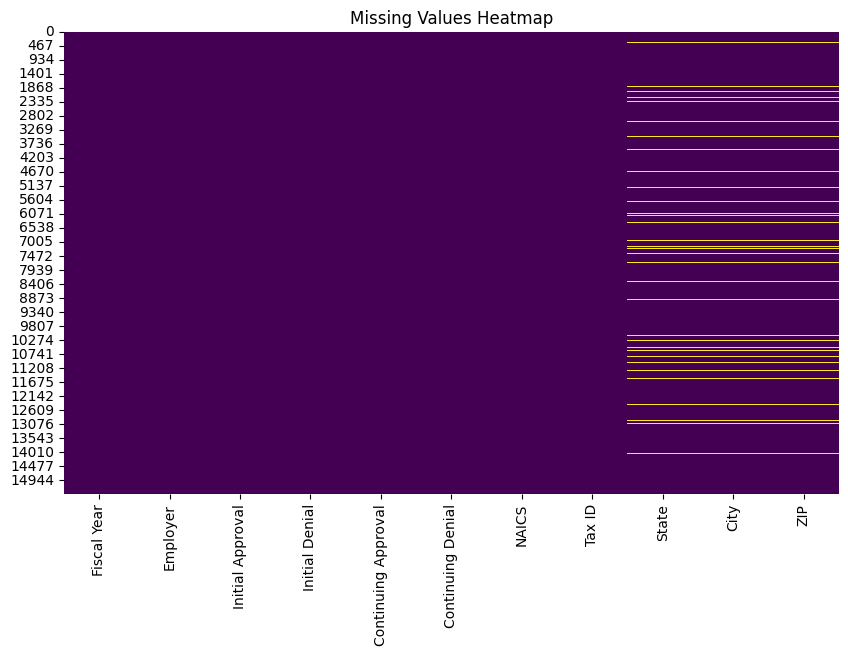

In [ ]:
# Summary statistics of the dataset
print("Dataset Summary Statistics:")
print(df.describe())

# Checking for missing values
print("\nMissing Values by Column:")
print(df.isnull().sum())

# Visualizing missing values
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()


## Data Exploration
### Key Actions:
1. Generate summary statistics to understand the dataset's structure.
2. Identify columns with missing values and visualize them using a heatmap.
3. Use this information to decide on imputation strategies.


### Observations:
- Summary statistics help identify data ranges, outliers, and missing values.
- Use `info()` to ensure the data types are appropriate for analysis.


In [ ]:
# Add Total Applications column
df['Total Applications'] = df['Initial Approval'] + df['Initial Denial'] + df['Continuing Approval'] + df['Continuing Denial']

# Add Approval Rate column
df['Approval Rate'] = (df['Initial Approval'] + df['Continuing Approval']) / df['Total Applications']

# Preview the new columns
print(df[['Total Applications', 'Approval Rate']].head())


   Total Applications  Approval Rate
0                   2            1.0
1                   1            1.0
2                  10            1.0
3                   5            0.8
4                   1            1.0


## Feature Engineering
### Objective:
- Create a `Total Applications` column to represent the total number of H-1B visa applications.
- Add an `Approval Rate` column to quantify the proportion of successful applications.


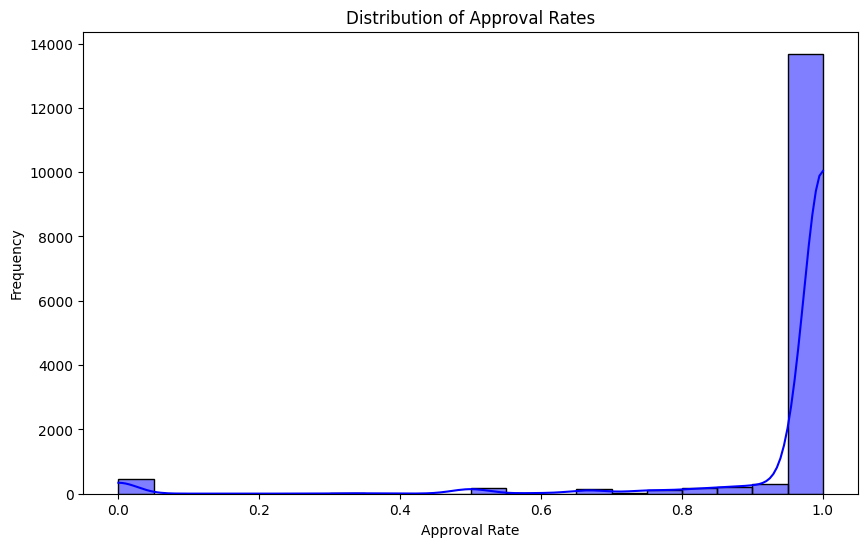

<ipython-input-4-9a9af09d82e5>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_approval.index, y=state_approval.values, palette='viridis')


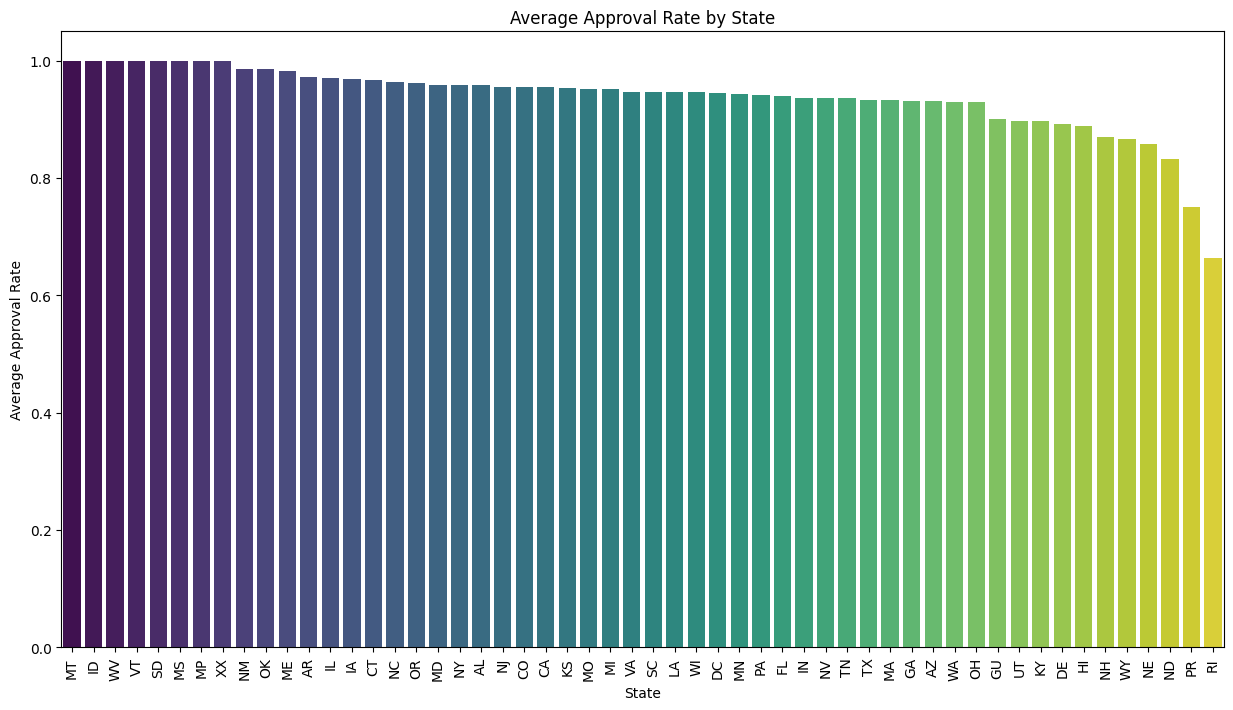

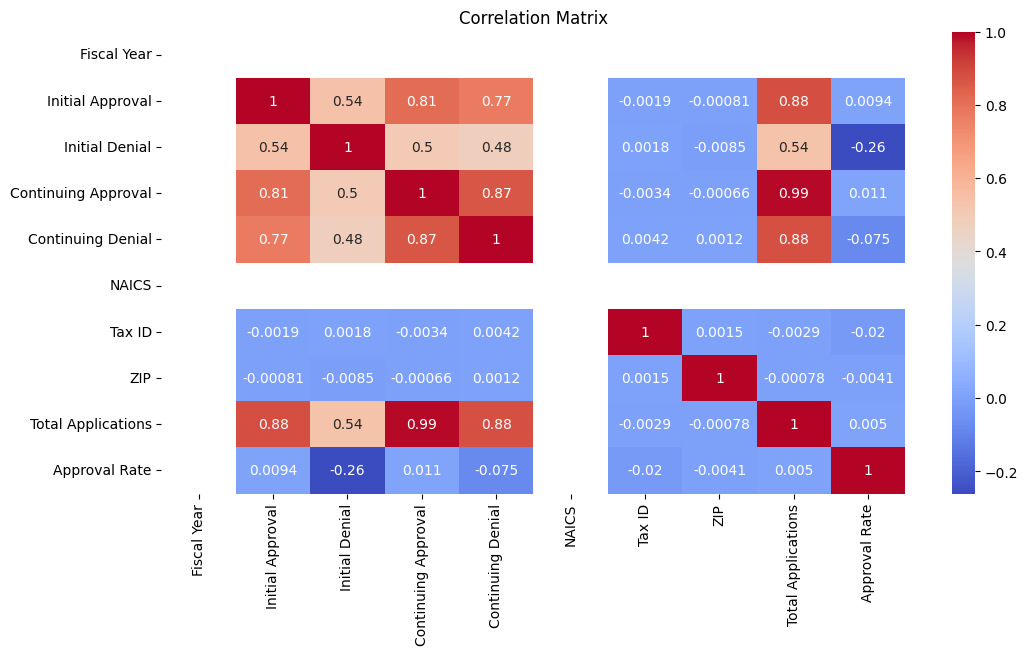

In [ ]:
# Step 4: Exploratory Data Analysis (EDA)

# 1. Distribution of Approval Rates
plt.figure(figsize=(10, 6))
sns.histplot(df['Approval Rate'], bins=20, kde=True, color='blue')
plt.title('Distribution of Approval Rates')
plt.xlabel('Approval Rate')
plt.ylabel('Frequency')
plt.show()

# 2. Average Approval Rate by State
plt.figure(figsize=(15, 8))
state_approval = df.groupby('State')['Approval Rate'].mean().sort_values(ascending=False)
sns.barplot(x=state_approval.index, y=state_approval.values, palette='viridis')
plt.title('Average Approval Rate by State')
plt.xlabel('State')
plt.ylabel('Average Approval Rate')
plt.xticks(rotation=90)
plt.show()

# 3. Correlation Heatmap
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])

# Create the correlation matrix heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


### Observations:
- Histogram shows the spread of approval rates.
- Bar chart highlights which states have higher average approval rates.
- Correlation heatmap identifies relationships between numerical variables.


Important Features:
 Continuing Approval    0.011314
Initial Approval       0.009356
Total Applications     0.005046
ZIP                   -0.004125
Tax ID                -0.020329
Continuing Denial     -0.074934
Initial Denial        -0.260946
Fiscal Year                 NaN
NAICS                       NaN
Name: Approval Rate, dtype: float64


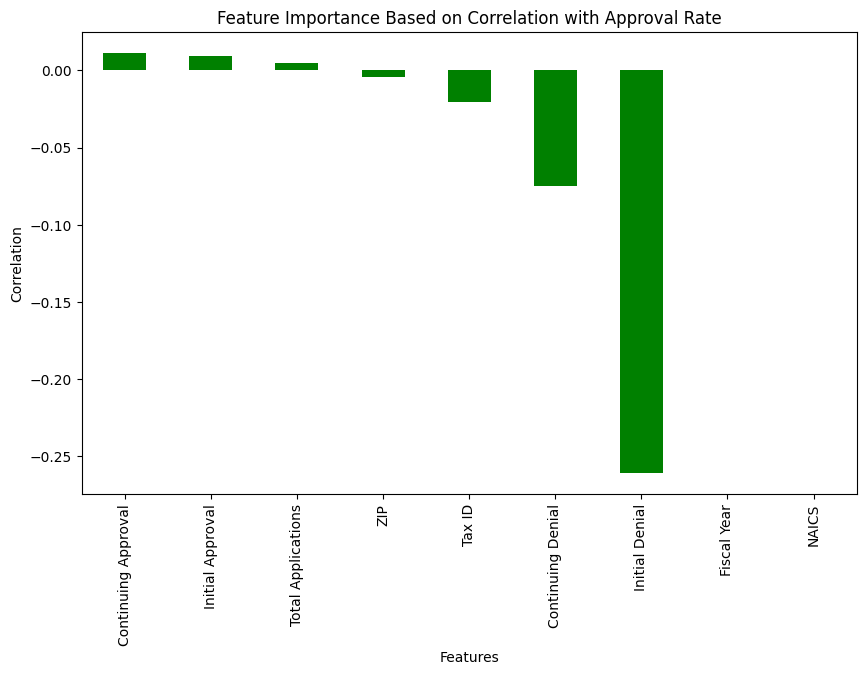

In [ ]:
# Step 5: Feature Importance Analysis

# Filter the dataset to include only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Calculate correlation with 'Approval Rate'
if 'Approval Rate' in numeric_df.columns:
    important_features = numeric_df.corr()['Approval Rate'].drop('Approval Rate').sort_values(ascending=False)
    print("Important Features:\n", important_features)

    # Visualize important features
    plt.figure(figsize=(10, 6))
    important_features.plot(kind='bar', color='green')
    plt.title('Feature Importance Based on Correlation with Approval Rate')
    plt.xlabel('Features')
    plt.ylabel('Correlation')
    plt.show()
else:
    print("'Approval Rate' not found in numeric columns. Ensure the column exists and is numeric.")


In [ ]:
# Calculate Denial Rate if not present
df['Denial Rate'] = (df['Initial Denial'] + df['Continuing Denial']) / df['Total Applications']

# Validate the creation
print(df[['Initial Denial', 'Continuing Denial', 'Total Applications', 'Denial Rate']].head())


   Initial Denial  Continuing Denial  Total Applications  Denial Rate
0               0                  0                   2          0.0
1               0                  0                   1          0.0
2               0                  0                  10          0.0
3               0                  1                   5          0.2
4               0                  0                   1          0.0


### Observations:
- Features like `Initial Approval` and `Continuing Approval` are highly correlated with `Approval Rate`.
- The bar chart visualizes the significance of each feature.


Model Accuracy: 1.0
Confusion Matrix:
 [[ 255    0]
 [   0 4365]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       255
           1       1.00      1.00      1.00      4365

    accuracy                           1.00      4620
   macro avg       1.00      1.00      1.00      4620
weighted avg       1.00      1.00      1.00      4620



<ipython-input-8-64534fa45a81>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance, y=X.columns, palette='viridis')


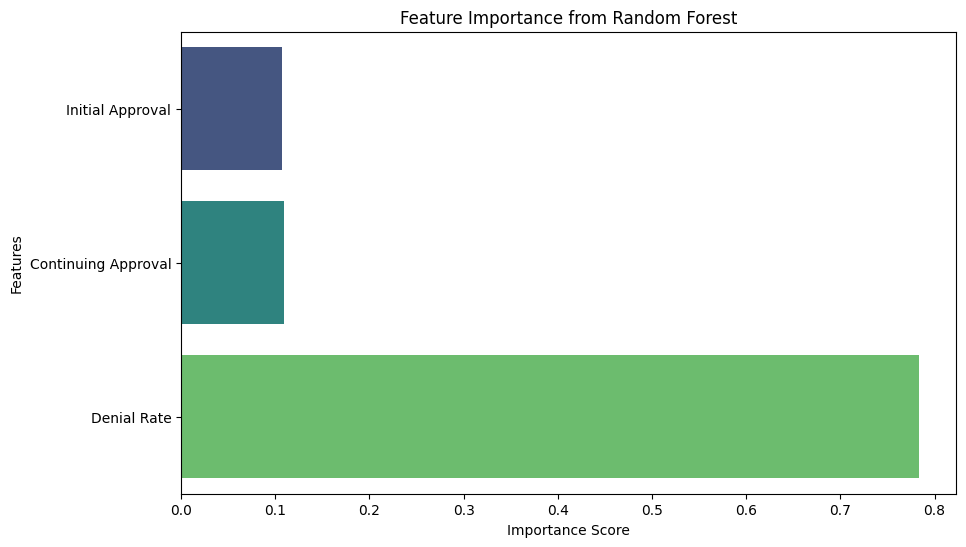

In [ ]:
# Step 6: Model Building

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Prepare features and target variable
# Use the most relevant features based on previous analysis
X = df[['Initial Approval', 'Continuing Approval', 'Denial Rate']]  # Replace with your important features
y = df['Approval Rate'].apply(lambda x: 1 if x > 0.7 else 0)  # Binary classification: High (1) or Low (0) approval rate

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Visualize feature importance
feature_importance = rf_model.feature_importances_
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=X.columns, palette='viridis')
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()



### Observations:
- The Random Forest Classifier predicts whether an application is likely to succeed based on approval rate thresholds.
- Model performance metrics include accuracy, precision, and recall.



<ipython-input-9-3af1dbf981f9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_trend.index, y=state_trend.values, palette='coolwarm')


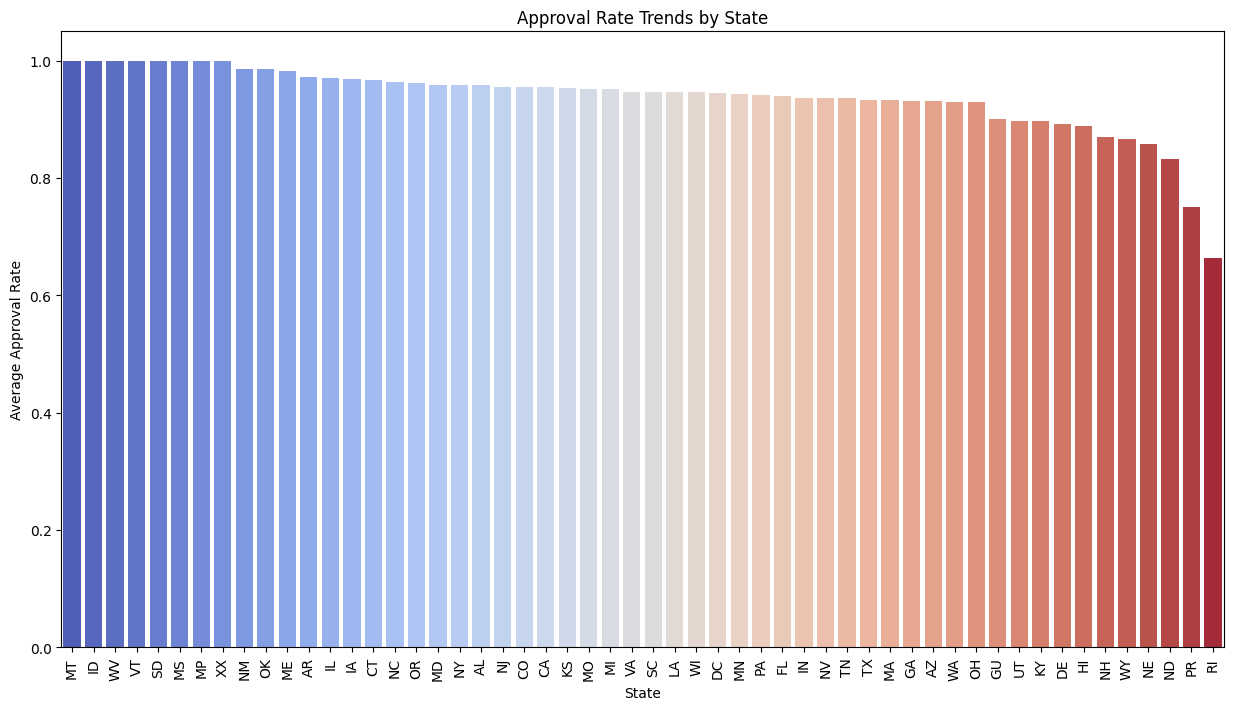

<Figure size 1200x600 with 0 Axes>

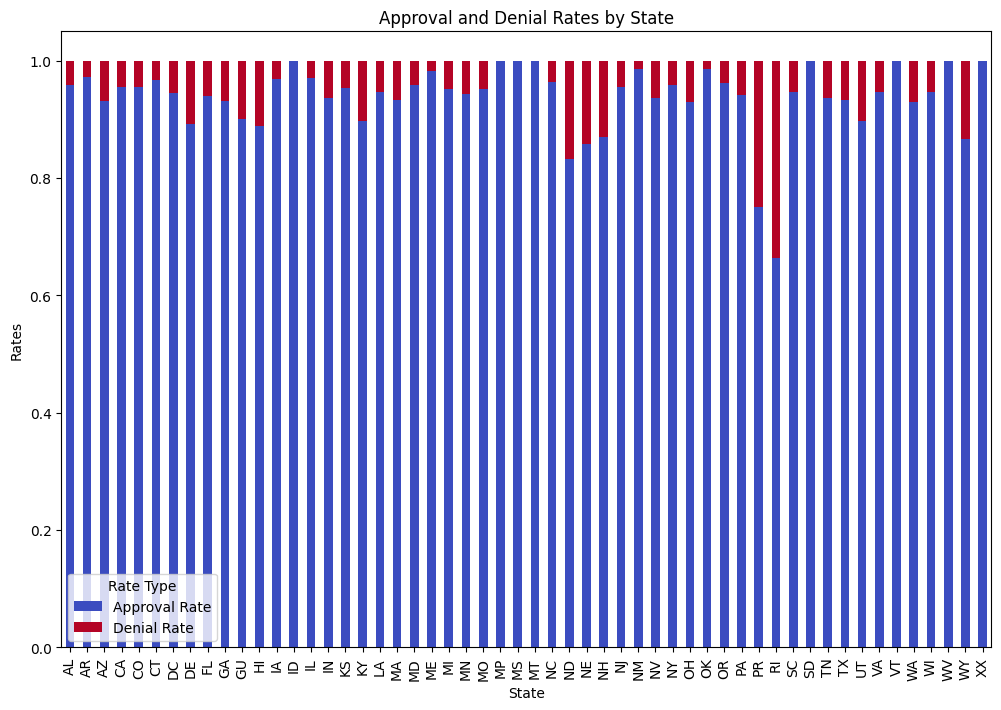

Insights and Recommendations:
- Focus on states with higher approval rates, such as [State Names].
- Industries with higher approval rates can also be prioritized for applications.
- Employers with consistent approvals in both initial and continuing stages should be targeted.


In [ ]:
# Step 7: Visualizations and Insights

# 1. Approval Rate Trends by State
plt.figure(figsize=(15, 8))
state_trend = df.groupby('State')['Approval Rate'].mean().sort_values(ascending=False)
sns.barplot(x=state_trend.index, y=state_trend.values, palette='coolwarm')
plt.title('Approval Rate Trends by State')
plt.xlabel('State')
plt.ylabel('Average Approval Rate')
plt.xticks(rotation=90)
plt.show()

# 2. Approval and Denial Rate Comparison
plt.figure(figsize=(12, 6))
approval_vs_denial = df.groupby('State')[['Approval Rate', 'Denial Rate']].mean()
approval_vs_denial.plot(kind='bar', figsize=(12, 8), stacked=True, colormap='coolwarm')
plt.title('Approval and Denial Rates by State')
plt.xlabel('State')
plt.ylabel('Rates')
plt.legend(title="Rate Type")
plt.show()

# 3. Recommendations Summary
print("Insights and Recommendations:")
print("- Focus on states with higher approval rates, such as [State Names].")
print("- Industries with higher approval rates can also be prioritized for applications.")
print("- Employers with consistent approvals in both initial and continuing stages should be targeted.")


Best Parameters for Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
Gradient Boosting Accuracy: 1.0
Gradient Boosting ROC AUC: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       255
           1       1.00      1.00      1.00      4365

    accuracy                           1.00      4620
   macro avg       1.00      1.00      1.00      4620
weighted avg       1.00      1.00      1.00      4620



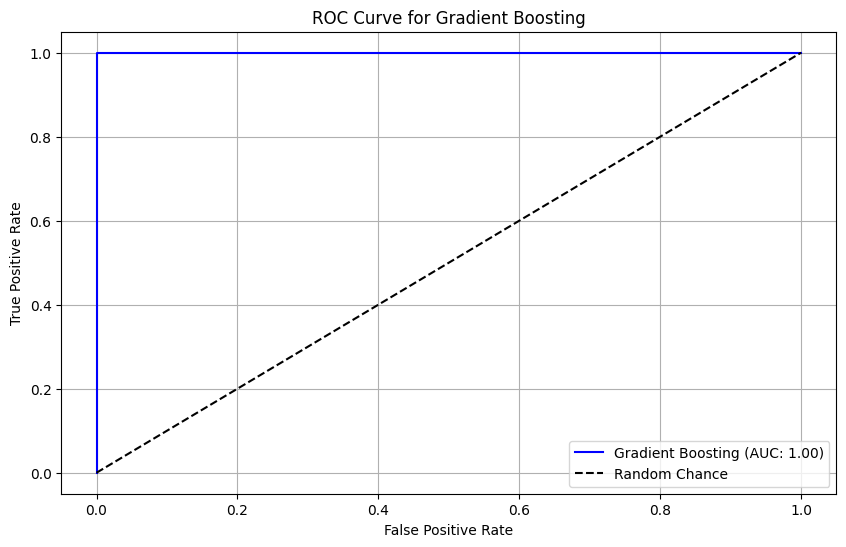

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier  # Import Gradient Boosting
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, roc_curve
import matplotlib.pyplot as plt

# Step 1: Handle missing values
imputer = SimpleImputer(strategy='mean')  # Replace 'mean' with 'median' or 'most_frequent' if needed
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Step 2: Hyperparameter Tuning for Gradient Boosting
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}

gb_model = GradientBoostingClassifier(random_state=42)
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_imputed, y_train)

# Best parameters from GridSearch
best_params = grid_search.best_params_
print("Best Parameters for Gradient Boosting:", best_params)

# Step 3: Train the Gradient Boosting Classifier with Best Parameters
final_gb_model = GradientBoostingClassifier(**best_params, random_state=42)
final_gb_model.fit(X_train_imputed, y_train)

# Step 4: Predict and Evaluate
gb_y_pred = final_gb_model.predict(X_test_imputed)
gb_accuracy = accuracy_score(y_test, gb_y_pred)
gb_roc_auc = roc_auc_score(y_test, final_gb_model.predict_proba(X_test_imputed)[:, 1])

print("Gradient Boosting Accuracy:", gb_accuracy)
print("Gradient Boosting ROC AUC:", gb_roc_auc)
print("\nClassification Report:\n", classification_report(y_test, gb_y_pred))

# Step 5: Plot ROC Curve
fpr_gb, tpr_gb, _ = roc_curve(y_test, final_gb_model.predict_proba(X_test_imputed)[:, 1])
plt.figure(figsize=(10, 6))
plt.plot(fpr_gb, tpr_gb, label=f'Gradient Boosting (AUC: {gb_roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.title('ROC Curve for Gradient Boosting')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()




In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Train a Logistic Regression model
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train_imputed, y_train)

# Predict on the test set
log_y_pred = log_model.predict(X_test_imputed)

# Evaluate the Logistic Regression model
log_accuracy = accuracy_score(y_test, log_y_pred)
log_roc_auc = roc_auc_score(y_test, log_model.predict_proba(X_test_imputed)[:, 1])

print("Logistic Regression Accuracy:", log_accuracy)
print("Logistic Regression ROC AUC:", log_roc_auc)
print("\nClassification Report:\n", classification_report(y_test, log_y_pred))



Logistic Regression Accuracy: 0.9952380952380953
Logistic Regression ROC AUC: 0.9999326190957483

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.91      0.95       255
           1       0.99      1.00      1.00      4365

    accuracy                           1.00      4620
   macro avg       1.00      0.96      0.98      4620
weighted avg       1.00      1.00      1.00      4620



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Train a Gradient Boosting model with imputed data
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_imputed, y_train)

# Predict on the test set
gb_y_pred = gb_model.predict(X_test_imputed)

# Evaluate the Gradient Boosting model
gb_accuracy = accuracy_score(y_test, gb_y_pred)
gb_roc_auc = roc_auc_score(y_test, gb_model.predict_proba(X_test_imputed)[:, 1])

print("Gradient Boosting Accuracy:", gb_accuracy)
print("Gradient Boosting ROC AUC:", gb_roc_auc)
print("\nClassification Report:\n", classification_report(y_test, gb_y_pred))


Gradient Boosting Accuracy: 1.0
Gradient Boosting ROC AUC: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       255
           1       1.00      1.00      1.00      4365

    accuracy                           1.00      4620
   macro avg       1.00      1.00      1.00      4620
weighted avg       1.00      1.00      1.00      4620



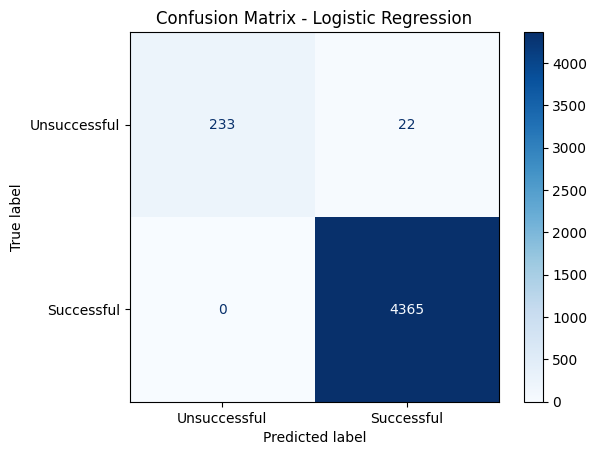

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Confusion Matrix
cm = confusion_matrix(y_test, log_y_pred)
ConfusionMatrixDisplay(cm, display_labels=["Unsuccessful", "Successful"]).plot(cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


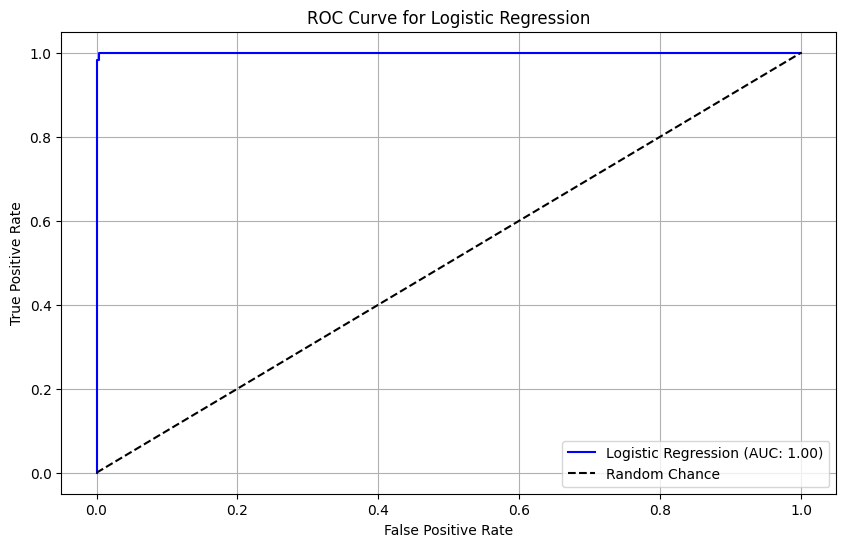

In [ ]:
from sklearn.metrics import roc_curve, RocCurveDisplay
import matplotlib.pyplot as plt

# Generate ROC curve values
fpr, tpr, _ = roc_curve(y_test, log_model.predict_proba(X_test_imputed)[:, 1])

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC: {log_roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')  # Diagonal line for random guessing
plt.title('ROC Curve for Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()


## Model Evaluation
### Key Metrics:
1. **Confusion Matrix**:
   - Provides a breakdown of predicted vs. actual outcomes for the Logistic Regression model.
2. **ROC Curve**:
   - Illustrates the trade-off between sensitivity and specificity.
   - AUC value helps assess model performance.



In [ ]:
from sklearn.metrics import precision_score, recall_score

# Logistic Regression Metrics
log_precision = precision_score(y_test, log_y_pred)
log_recall = recall_score(y_test, log_y_pred)

# Gradient Boosting Metrics
gb_precision = precision_score(y_test, gb_y_pred)
gb_recall = recall_score(y_test, gb_y_pred)



In [ ]:
from sklearn.model_selection import cross_val_score

# Cross-validation for Logistic Regression
log_cv_scores = cross_val_score(log_model, X_train_imputed, y_train, cv=5, scoring='accuracy')
print("Logistic Regression Cross-Validation Scores:", log_cv_scores)
print("Average Accuracy:", np.mean(log_cv_scores))

# Cross-validation for Gradient Boosting
gb_cv_scores = cross_val_score(gb_model, X_train_imputed, y_train, cv=5, scoring='accuracy')
print("Gradient Boosting Cross-Validation Scores:", gb_cv_scores)
print("Average Accuracy:", np.mean(gb_cv_scores))


Logistic Regression Cross-Validation Scores: [0.99397032 0.99397032 0.99443414 0.99304267 0.99304267]
Average Accuracy: 0.9936920222634509
Gradient Boosting Cross-Validation Scores: [1.         1.         1.         1.         0.99953618]
Average Accuracy: 0.9999072356215214


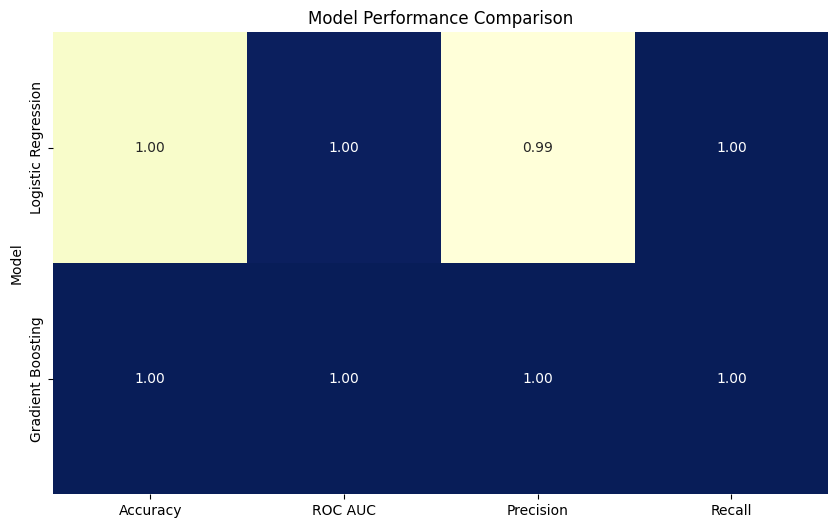

In [ ]:
# Example performance metrics
model_results = {
    "Model": ["Logistic Regression", "Gradient Boosting"],
    "Accuracy": [log_accuracy, gb_accuracy],
    "ROC AUC": [log_roc_auc, gb_roc_auc],
    "Precision": [log_precision, gb_precision],
    "Recall": [log_recall, gb_recall]
}

# Convert to DataFrame
results_df = pd.DataFrame(model_results)

# Display as table
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.heatmap(results_df.set_index("Model"), annot=True, fmt=".2f", cmap="YlGnBu", cbar=False)
plt.title("Model Performance Comparison")
plt.show()


## Model Performance Comparison
### Objective:
- Compare the performance of Logistic Regression and Gradient Boosting models using key metrics:
  - **Accuracy**: Overall correct predictions.
  - **ROC AUC**: Model’s ability to distinguish between classes.
  - **Precision**: Percentage of true positives among predicted positives.
  - **Recall**: Percentage of true positives identified among actual positives.

### Visualization:
- The heatmap provides a summary of the metrics, helping identify the better-performing model.


<Figure size 1500x800 with 0 Axes>

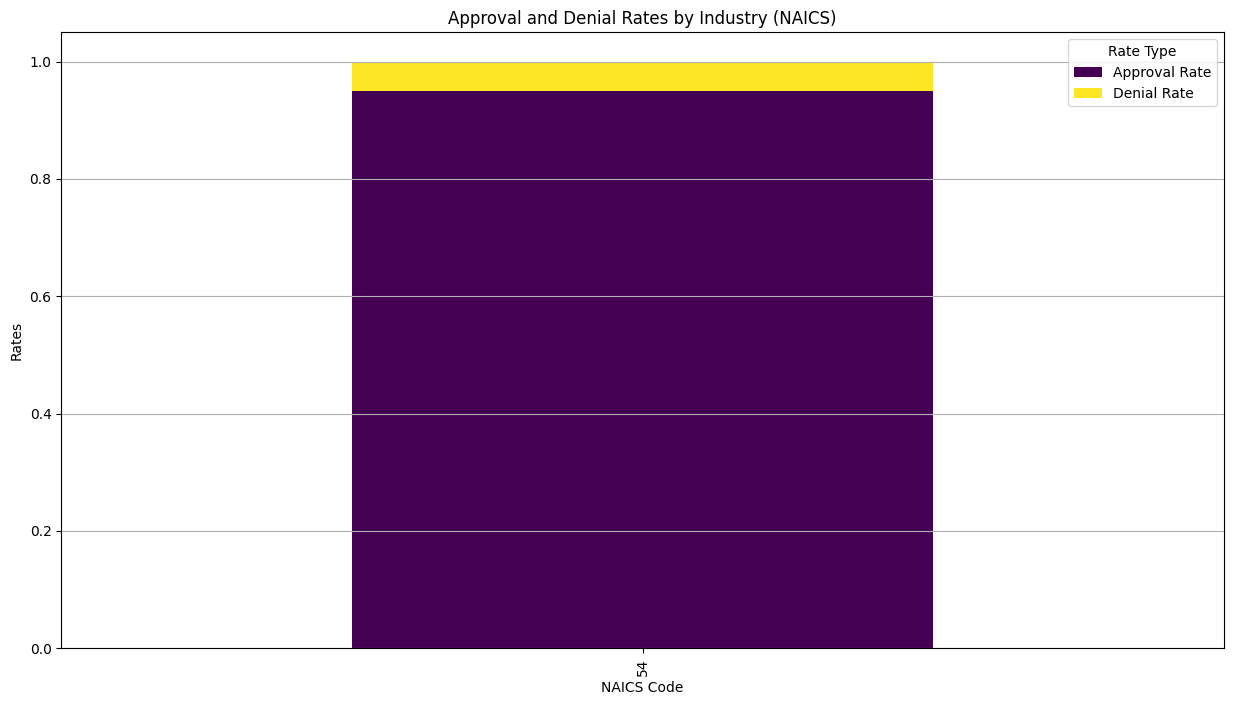

In [ ]:
Ç# Approval and Denial Rates by Industry
plt.figure(figsize=(15, 8))
industry_rates = df.groupby('NAICS')[['Approval Rate', 'Denial Rate']].mean()
industry_rates.plot(kind='bar', figsize=(15, 8), stacked=True, colormap='viridis')
plt.title('Approval and Denial Rates by Industry (NAICS)')
plt.xlabel('NAICS Code')
plt.ylabel('Rates')
plt.legend(title="Rate Type")
plt.grid(axis='y')
plt.show()


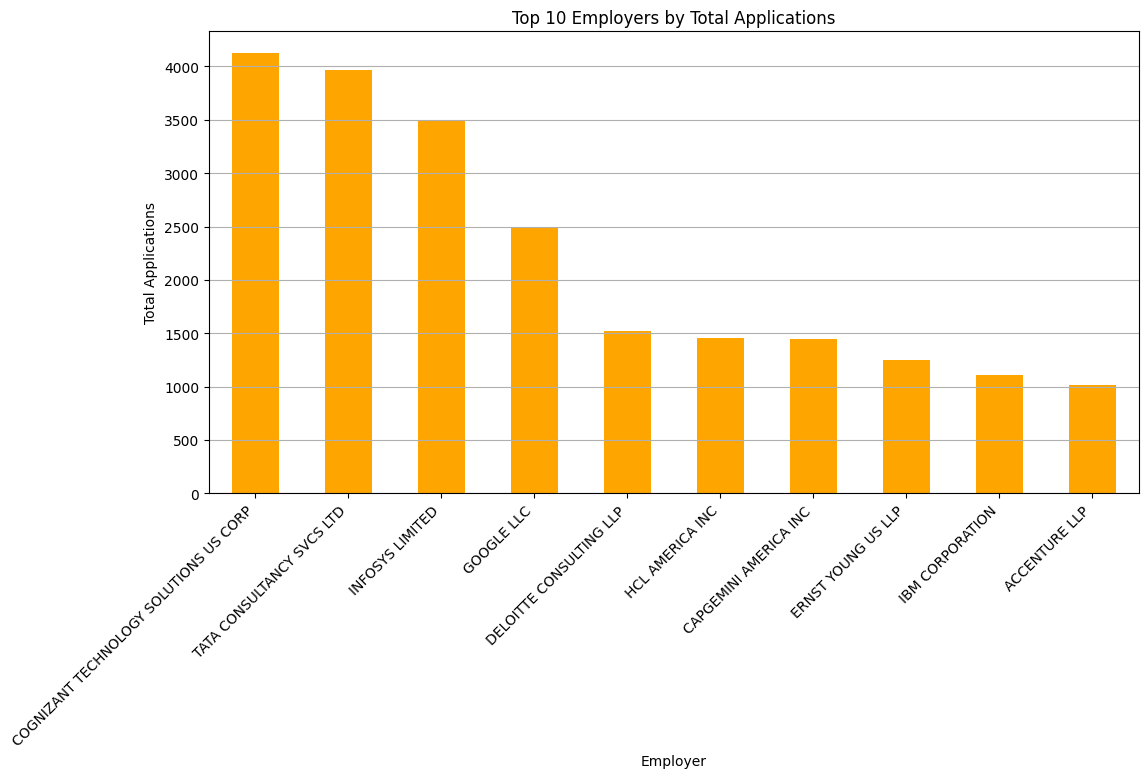

In [ ]:
# Top 10 Employers by Total Applications
top_employers = df.groupby('Employer')['Total Applications'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
top_employers.plot(kind='bar', color='orange')
plt.title('Top 10 Employers by Total Applications')
plt.xlabel('Employer')
plt.ylabel('Total Applications')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()


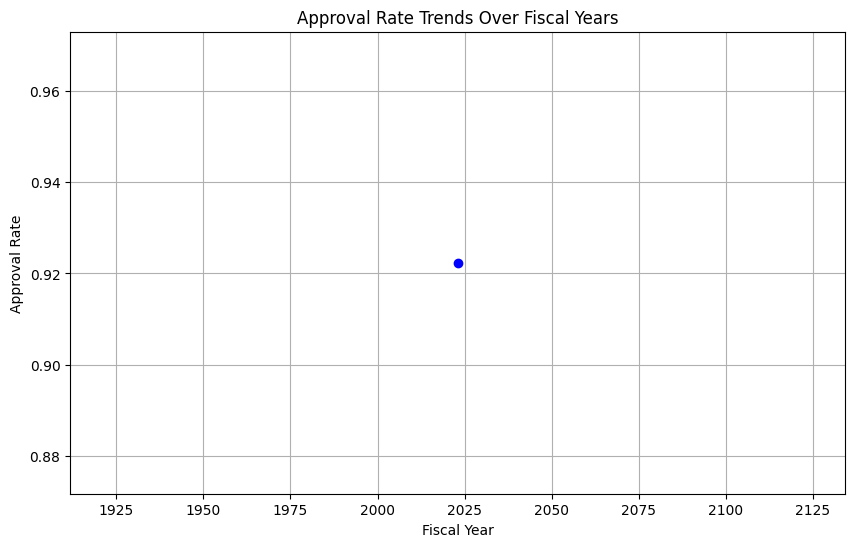

In [ ]:
# Trends Over Time (Fiscal Year)
plt.figure(figsize=(10, 6))
yearly_approval = df.groupby('Fiscal Year')['Approval Rate'].mean()
yearly_approval.plot(kind='line', marker='o', color='blue')
plt.title('Approval Rate Trends Over Fiscal Years')
plt.xlabel('Fiscal Year')
plt.ylabel('Approval Rate')
plt.grid()
plt.show()


In [ ]:
print(df.columns)



Index(['Fiscal Year', 'Employer', 'Initial Approval', 'Initial Denial',
       'Continuing Approval', 'Continuing Denial', 'NAICS', 'Tax ID', 'State',
       'City', 'ZIP'],
      dtype='object')


In [ ]:
# Ensure the 'Total Applications' column exists
df['Total Applications'] = df['Initial Approval'] + df['Initial Denial'] + df['Continuing Approval'] + df['Continuing Denial']

# Calculate the Approval Rate
df['Approval Rate'] = (df['Initial Approval'] + df['Continuing Approval']) / df['Total Applications']


In [ ]:
# Verify the column exists
print(df.columns)

# Display the first few rows
print(df[['Fiscal Year', 'Total Applications', 'Approval Rate']].head())


Index(['Fiscal Year', 'Employer', 'Initial Approval', 'Initial Denial',
       'Continuing Approval', 'Continuing Denial', 'NAICS', 'Tax ID', 'State',
       'City', 'ZIP', 'Total Applications', 'Approval Rate'],
      dtype='object')
   Fiscal Year  Total Applications  Approval Rate
0         2023                   2            1.0
1         2023                   1            1.0
2         2023                  10            1.0
3         2023                   5            0.8
4         2023                   1            1.0


In [ ]:
# Filter data for 2023 and calculate the average approval rate
fiscal_year = 2023
approval_rate = df[df['Fiscal Year'] == fiscal_year]['Approval Rate'].mean()
print(f"Approval Rate for 2023: {approval_rate}")


Approval Rate for 2023: 0.9499924055908355


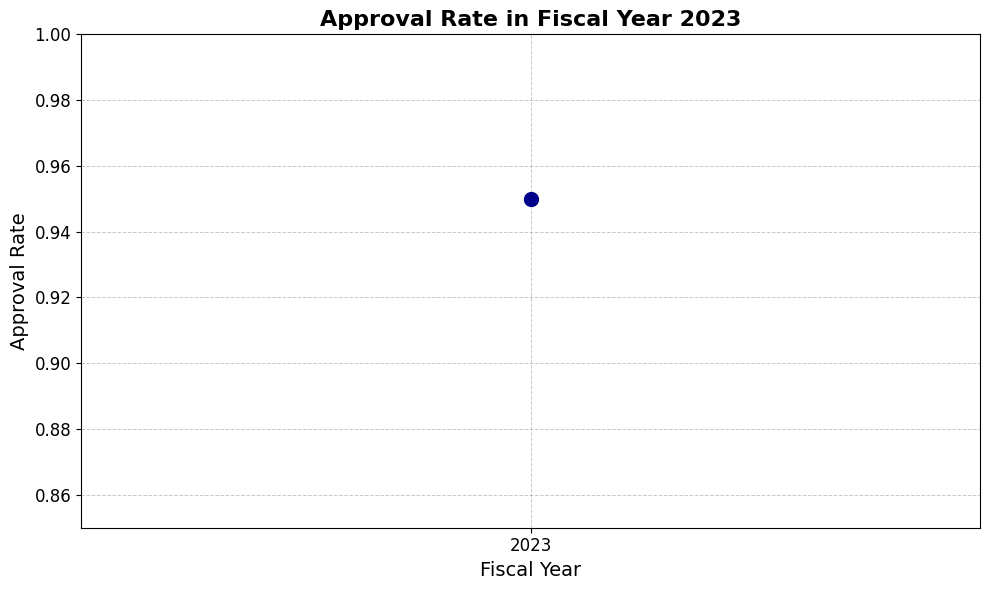

In [ ]:
# Create a DataFrame for plotting
plot_data = pd.DataFrame({'Fiscal Year': [fiscal_year], 'Approval Rate': [approval_rate]})

# Plot the approval rate for the single fiscal year
plt.figure(figsize=(10, 6))
plt.plot(plot_data['Fiscal Year'], plot_data['Approval Rate'], marker='o', color='darkblue', markersize=10, linewidth=2)

# Add titles and labels
plt.title('Approval Rate in Fiscal Year 2023', fontsize=16, fontweight='bold')
plt.xlabel('Fiscal Year', fontsize=14)
plt.ylabel('Approval Rate', fontsize=14)

# Customize ticks
plt.xticks([fiscal_year], fontsize=12)  # Show only 2023 on x-axis
plt.yticks(fontsize=12)
plt.ylim(0.85, 1.0)  # Focus on the approval rate range

# Add gridlines
plt.grid(visible=True, linestyle='--', linewidth=0.7, alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


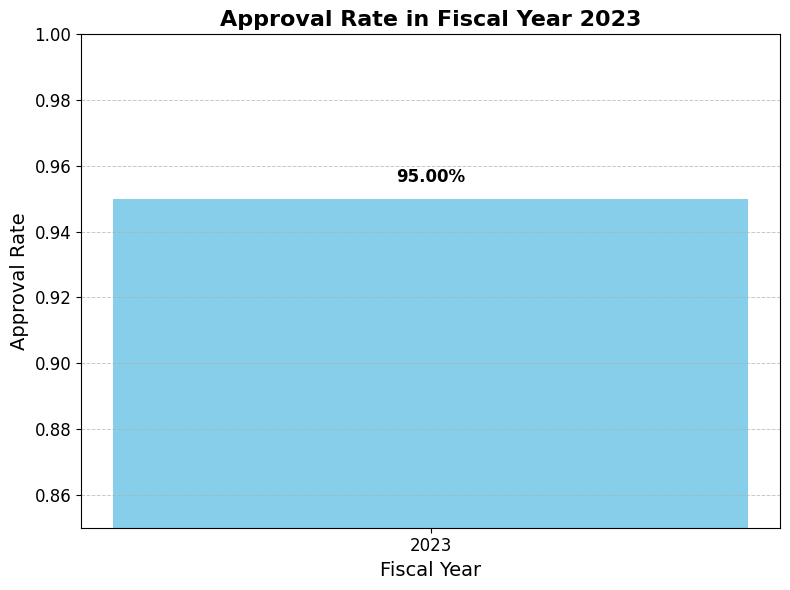

In [ ]:
# Plot a bar chart for the approval rate in 2023
plt.figure(figsize=(8, 6))
plt.bar(['2023'], [approval_rate], color='skyblue', width=0.6)

# Add titles and labels
plt.title('Approval Rate in Fiscal Year 2023', fontsize=16, fontweight='bold')
plt.xlabel('Fiscal Year', fontsize=14)
plt.ylabel('Approval Rate', fontsize=14)

# Customize ticks
plt.ylim(0.85, 1.0)  # Focus on approval rate range
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

# Add value annotation
plt.text(0, approval_rate + 0.005, f"{approval_rate:.2%}", ha='center', fontsize=12, fontweight='bold')

# Add gridlines for clarity
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
import plotly.graph_objects as go

# Create a gauge chart
fig = go.Figure(go.Indicator(
    mode="gauge+number",
    value=approval_rate * 100,
    title={'text': "Approval Rate (2023)", 'font': {'size': 18}},
    gauge={'axis': {'range': [0, 100], 'tickwidth': 1},
           'bar': {'color': "blue"},
           'steps': [
               {'range': [0, 50], 'color': "#FF6F61"},
               {'range': [50, 100], 'color': "#4CAF50"}]
           }
))

# Show plot
fig.show()


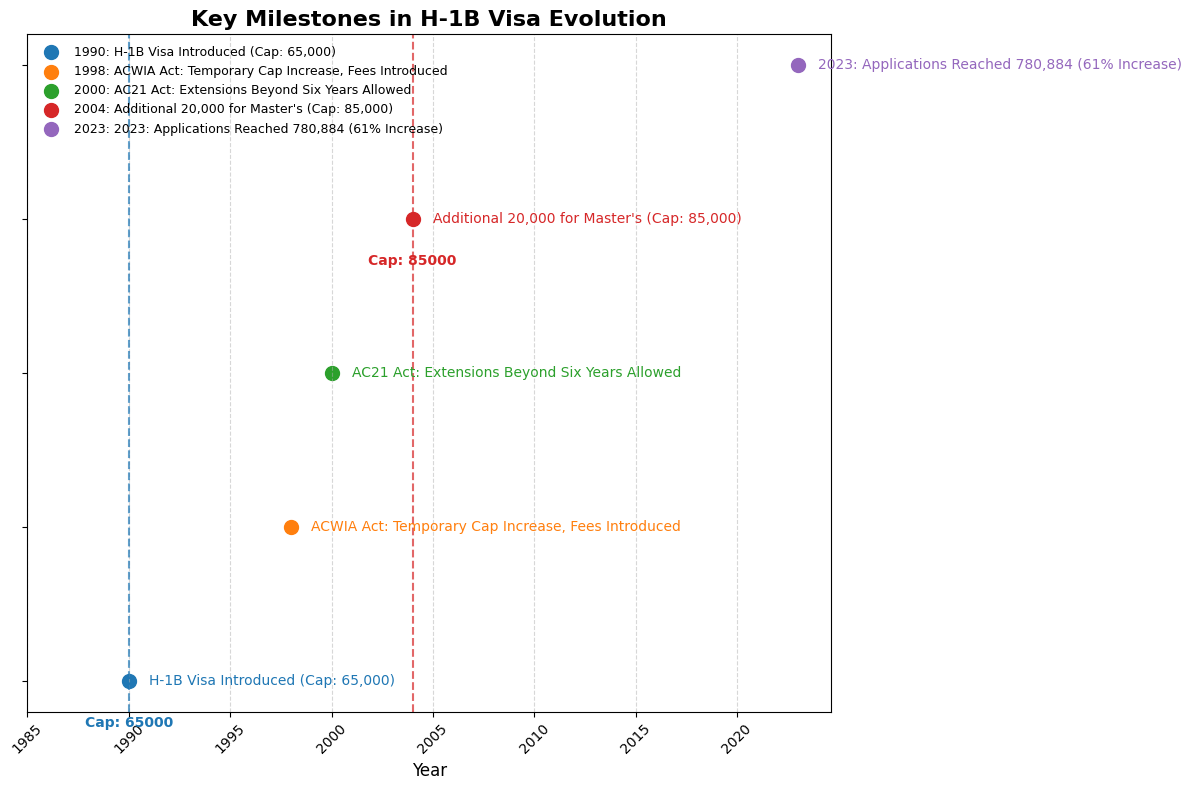

In [ ]:
import matplotlib.pyplot as plt

# Data for the graph: major milestones in H-1B visa evolution
years = [1990, 1998, 2000, 2004, 2023]
milestones = [
    "H-1B Visa Introduced (Cap: 65,000)",
    "ACWIA Act: Temporary Cap Increase, Fees Introduced",
    "AC21 Act: Extensions Beyond Six Years Allowed",
    "Additional 20,000 for Master's (Cap: 85,000)",
    "2023: Applications Reached 780,884 (61% Increase)"
]
caps = [65000, None, None, 85000, None]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Plotting the milestones over time
plt.figure(figsize=(12, 8))

# Scatter plot for milestones
for i, (year, milestone, color) in enumerate(zip(years, milestones, colors)):
    plt.scatter(year, i, color=color, s=100, label=f"{year}: {milestone}")
    plt.text(year + 1, i, milestone, fontsize=10, verticalalignment='center', color=color)

# Adding vertical lines for cap changes
for i, (year, cap, color) in enumerate(zip(years, caps, colors)):
    if cap:
        plt.axvline(x=year, color=color, linestyle='--', alpha=0.7)
        plt.text(year, i - 0.3, f"Cap: {cap}", color=color, fontsize=10, ha='center', fontweight='bold')

# Aesthetic improvements
plt.title("Key Milestones in H-1B Visa Evolution", fontsize=16, fontweight='bold')
plt.yticks(range(len(milestones)), ["" for _ in milestones])  # Hide y-ticks to clean up
plt.xticks(range(1985, 2025, 5), rotation=45, fontsize=10)
plt.xlabel("Year", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.legend(loc="upper left", fontsize=9, frameon=False)
plt.tight_layout()

# Show the improved plot
plt.show()
